We know that the client wants to understand the top 5 content categories. Have a think about what are the best ways to present this? In a pie chart? In a bar chart?

There are also some other interesting insights that we might want to share with them. For example:

How many unique categories are there?
How many reactions are there to the most popular category?
What was the month with the most posts?

In [1]:
import pandas as pd

# Read the CSV files
task_3 = pd.read_csv('Task 3_Final Content Data set.csv')
task_3.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [2]:
# Check that all Dtypes are correct
print(task_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB
None


In [3]:
# Convert columns to the specified data types
task_3['Content ID'] = task_3['Content ID'].astype(str)
task_3['Reaction Type'] = task_3['Reaction Type'].astype(str)
task_3['Datetime'] = pd.to_datetime(task_3['Datetime'], format='%d/%m/%y %H:%M')
task_3['Content Type'] = task_3['Content Type'].astype(str)
task_3['Category'] = task_3['Category'].astype(str)
task_3['Sentiment'] = task_3['Sentiment'].astype(str)
task_3['Score'] = task_3['Score'].astype(int)

In [4]:
# Re-check that all Dtypes are correct
print(task_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     24573 non-null  int64         
 1   Content ID     24573 non-null  object        
 2   Reaction Type  24573 non-null  object        
 3   Datetime       24573 non-null  datetime64[ns]
 4   Content Type   24573 non-null  object        
 5   Category       24573 non-null  object        
 6   Sentiment      24573 non-null  object        
 7   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.5+ MB
None


## Top 5 most popular categories

get total score for all categories, sort from largest to smallest 

In [5]:
# Calculate the total scores for each category
category_scores = task_3.groupby('Category')['Score'].sum().reset_index()

# Get the top 5 performing categories
top_categories = category_scores.nlargest(5, 'Score')

# Display the top 5 categories
print("\nTop 5 Performing Categories:")
print(top_categories)


Top 5 Performing Categories:
          Category  Score
0          animals  74965
9          science  71168
7   healthy eating  69339
12      technology  68738
6             food  66676


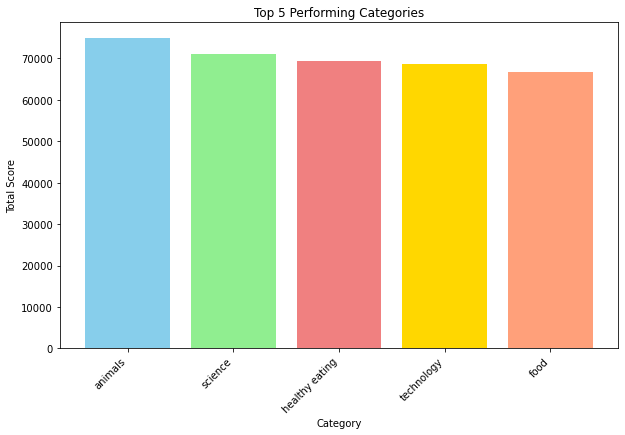

In [6]:
import matplotlib.pyplot as plt

# Assuming you already have top_categories DataFrame

# Define colors for each bar
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsalmon']

# Plotting the bar plot with custom colors
plt.figure(figsize=(10, 6))
plt.bar(top_categories['Category'], top_categories['Score'], color=bar_colors)
plt.title('Top 5 Performing Categories')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


## How many unique categories are there?

count number of unique categories and print answer

In [8]:
unique_categories_count = task_3['Category'].nunique()

print(f"The number of unique categories is: {unique_categories_count}")


The number of unique categories is: 16


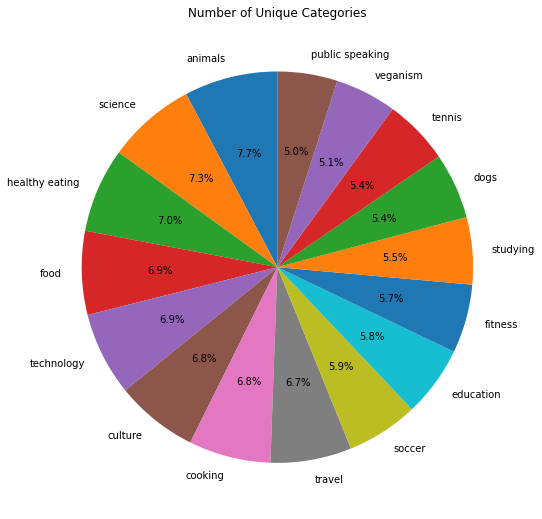

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for colormaps

# Assuming you already have task_3 DataFrame

# Count the occurrences of each category
category_counts = task_3['Category'].value_counts()

# Plotting the pie chart with a colormap
plt.figure(figsize=(9, 9))
colors = sns.color_palette("tab10")  # Use a colormap with distinct colors
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Number of Unique Categories')
plt.show()


## How many reactions are there to the most popular category?

Most popular category is animals. create df of filtered category column only with animal in it.
count total number of reactions to animals category.

In [9]:
# Filter the DataFrame to include only 'animals' category
animals_df = task_3[task_3['Category'] == 'animals']

# Count the total number of reactions to the 'animals' category
total_reactions_to_animals = animals_df.shape[0]

# Display the DataFrame with 'animals' category and total reactions
print("DataFrame with 'animals' category:")
print(animals_df)

print(f"\nTotal number of reactions to 'animals' category: {total_reactions_to_animals}")


DataFrame with 'animals' category:
       Unnamed: 0                            Content ID Reaction Type  \
910           910  07f88a73-aef2-45fd-8b5d-418e448b853d       cherish   
911           911  07f88a73-aef2-45fd-8b5d-418e448b853d     intrigued   
912           912  07f88a73-aef2-45fd-8b5d-418e448b853d          like   
913           913  07f88a73-aef2-45fd-8b5d-418e448b853d          love   
914           914  07f88a73-aef2-45fd-8b5d-418e448b853d          hate   
...           ...                                   ...           ...   
24369       24369  89cb4504-fccd-40f4-945e-410f74ee4735        scared   
24370       24370  89cb4504-fccd-40f4-945e-410f74ee4735    super love   
24371       24371  89cb4504-fccd-40f4-945e-410f74ee4735          hate   
24372       24372  89cb4504-fccd-40f4-945e-410f74ee4735          love   
24373       24373  89cb4504-fccd-40f4-945e-410f74ee4735       disgust   

                 Datetime Content Type Category Sentiment  Score  
910   2021-03-12 16:2

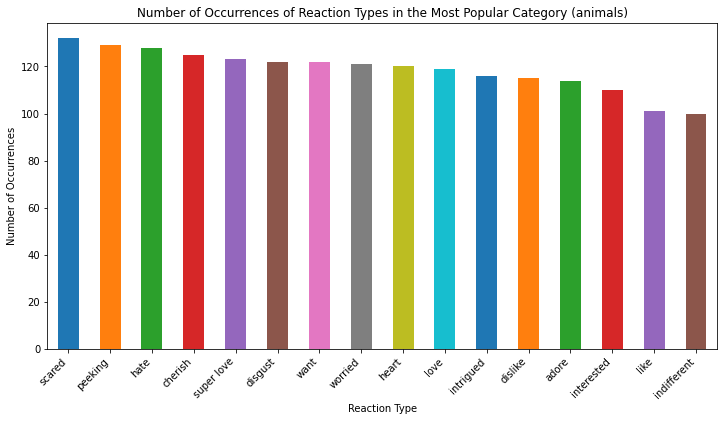

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for colormaps


# Calculate the total scores for each category
category_scores = task_3.groupby('Category')['Score'].sum().reset_index()

# Get the most popular category
most_popular_category = category_scores.loc[category_scores['Score'].idxmax(), 'Category']

# Filter the DataFrame for the most popular category
reactions_most_popular = task_3[task_3['Category'] == most_popular_category]

# Count the occurrences of each reaction type within the most popular category
reaction_counts = reactions_most_popular['Reaction Type'].value_counts()

# Plotting the bar plot with a colormap
plt.figure(figsize=(12, 6))
colors = sns.color_palette("tab10")  # Use a colormap with distinct colors
reaction_counts.plot(kind='bar', color=colors)
plt.title(f'Number of Occurrences of Reaction Types in the Most Popular Category ({most_popular_category})')
plt.xlabel('Reaction Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


## What was the month with the most posts?

count how many times each month appears in datetime column, sort by month from most to least.

In [10]:
# Extract month from the 'Datetime' column
task_3['Month'] = task_3['Datetime'].dt.month

# Count the occurrences of each month
monthly_post_counts = task_3['Month'].value_counts()

# Sort the result by month from most to least
sorted_monthly_post_counts = monthly_post_counts.sort_values(ascending=False)

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the month numbers to month names in the result
sorted_monthly_post_counts.index = sorted_monthly_post_counts.index.map(month_names)

# Display the top N months with the most posts
N = 12  # Change N to the number of months you want to display
print(f"Top {N} months with the most posts:")
print(sorted_monthly_post_counts.head(N))

Top 12 months with the most posts:
May          2138
January      2126
August       2114
December     2092
July         2070
October      2056
November     2034
September    2022
June         2021
March        2012
April        1974
February     1914
Name: Month, dtype: int64


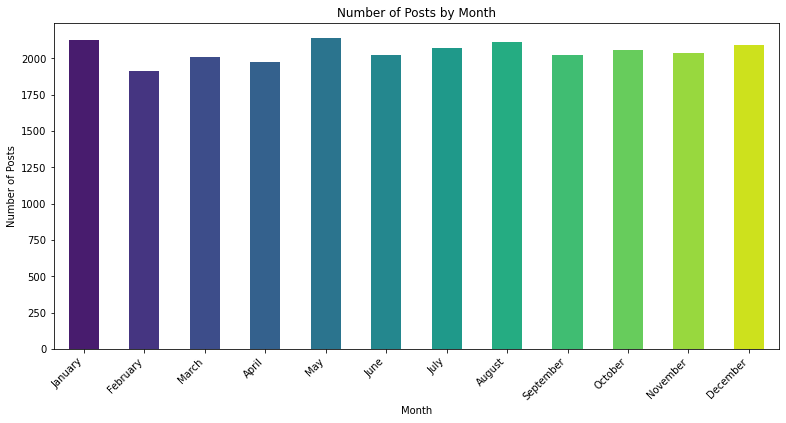

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for colormaps

# Assuming you already have task_3 DataFrame

# Extract month from the 'Datetime' column
task_3['Month'] = task_3['Datetime'].dt.month

# Count the occurrences of each month
monthly_post_counts = task_3['Month'].value_counts()

# Sort the result by month from most to least
sorted_monthly_post_counts = monthly_post_counts.sort_index(ascending=True)

# Plotting the bar plot with a colormap
plt.figure(figsize=(13, 6))
colors = sns.color_palette("viridis", len(sorted_monthly_post_counts))  # Use a colormap with distinct colors
sorted_monthly_post_counts.plot(kind='bar', color=colors)
plt.title('Number of Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')

# Replace numeric labels with month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
plt.xticks(range(0, 12), month_names, rotation=45, ha='right')  # Adjust the range for correct positions

plt.show()
